## Data Analysis Steps

### 0. First things first

I will first import the necessary modules for my project.


In [5]:
import os

import pandas

import statistics

import statsmodels.formula.api as smf

from matplotlib import pyplot as plt

import seaborn

from patsy import PatsyError

We need our raw data to be read by the program, so that we can work on it.
You can obtain the data from the link I provided in the README.md file under the section "Source Information". In order to use the script as provided, you should make sure that "bugs.csv" file is located in your current working directory (cwd). 
If the csv file you are looking for is not in your cwd, an error will be raised that instructs you to check your cwd by entering **%pwd**. In order to change your cwd type **%cd** followed by a space and the path to the new cwd. DF here will stand for data frame. Let's now reach and display the data.

*Source:* https://stackoverflow.com/questions/15680463/change-ipython-jupyter-notebook-working-directory

In [11]:
try:
    
    filepath = os.path.join('bugs.csv')

    DF = pandas.read_csv(filepath)

    print(DF)
    
except FileNotFoundError :
    
    raise FileNotFoundError ("Please make sure the that the csv file is located in your current working directory  To find out which directory you are currently working on enter the following: %pwd  To change your current working directory, type %cd followed by a space and the path to the new cwd.")
    
    


     Subject     Sex Disgust  Fear  KillRating
0          1  Female     low   low         6.0
1          3  Female     low   low         5.0
2          4  Female     low   low         6.0
3          5  Female     low   low         3.0
4          6  Female     low   low         2.0
..       ...     ...     ...   ...         ...
343       96    Male    high  high        10.0
344       97  Female    high  high        10.0
345       98  Female    high  high        10.0
346       99  Female    high  high        10.0
347      100  Female    high  high         3.0

[348 rows x 5 columns]


As you can see, the dataset is relatively big, therefore only the first and last bit gets to be displayed. However, this is alright, as our variable columns and number of participants seem to be as expected. 

For the sake of flexibility of the program, I will assign the specific features of this dataframe into variables. When worked with another set of data or when made changes in the variable names, the program can be quickly adjusted. 

Please assign the appropriate string values to the PV1 (Predictor Variable 1), PV2 (Predictor Variable 2), and OV (Outcome Variable). 

In [12]:
PV1 = "Disgust"

PV2 = "Fear"

OV = "KillRating"

For example, if we additionally collected Size data for the bugs (and added the Size data to the csv file), and we are interested in Disgust and Size as predictor variables instead of Disgust and Fear, PV2 should be reassigned this way: PV2 = "Size"  <br />  Similarly, if you would like to add Size data but also keep the other 2 predictor variables you may assign a third PV this way by leaving the others as they are: PV3 = "Size"

### 1.  Summary Statistics of Kill Ratings



Here, I will first define a list that includes all the summary statistics I want to calculate, so that I can create a table including each of the relevant statistics. Minimum and Maximum exist as default statistics in Python but I retreived the others from the statistics module I have imported at the beginning. 

In [13]:
summary_stats = [min, statistics.median, statistics.mean, statistics.stdev, max]

The instructions specify that I should calculate the statistics for each group individually. That is to say
, I need a table that specifies the  OV (**KillRating**)'s summary statistics for the *HighDisgustHighFear, HighDisgustLowFear, LowDisgustHighFear, LowDisgustLowFear* subgroups individually. Therefore, I will group the data according to the two PV's and then print the summary statistics (of the OV: KillRating), not of the initial raw data, but of the grouped data. <br /> 

*Source:* https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [15]:
grouped_DF = DF.groupby([PV1, PV2])

print((grouped_DF[OV]).aggregate(summary_stats))

              min  median      mean     stdev   max
Disgust Fear                                       
high    high  0.0     8.5  7.804598  2.495760  10.0
        low   0.0     7.5  6.660920  3.151683  10.0
low     high  0.5     8.0  7.339080  2.551213  10.0
        low   0.0     6.0  5.632184  2.680094  10.0


In line with the example above, if you are alternatively interested in Disgust and Size, the summary stats will be given for the subgroups: *HighDisgustBigSize, HighDisgustSmallSize, LowDisgustBigSize, LowDisgustSmallSize*. You do not need to change the last part of the code for this, as variable names are assigned at the beginning. In case you added a new PV, you may modify the code this way: <br /> 

grouped_DF = DF.groupby([PV1, PV2, PV3])

print((grouped_DF[OV]).aggregate(summary_stats))

As we would expect, the highest desire to kill seems to be for the condition when the bug was found to be both highly disgusting and fear inducing. Along the same line, the lowest mean KillRating is for *LowDisgustLowFear* bugs. We cannot, however, be sure whether this trend indicates a statistically significant relationship without further testing. Let's now check that.

### 2. Linear Model Results

In order to calculate the inear model results, I will specify the formula of the linear equation. Then, by utilizing the ordinary least squares (ols) method of the smf module I have imported at the very beginning, I will define the statistical model and display the results.

**Note:** The formula needs to be a string, thus, we cannot use the variable names PV1, PV2 and OV. Please instead write the specific names of those three variables into the formula as strings. In case correct variable names are not written in the formula, the program will raise a NameError. <br /> 
For example, if the PV2 is reassigned as "Size", the formula should be: <br />
formula = 'KillRating ~ 1 + Disgust + Size'<br /> 
The rest may stay as it is.

**Note 2:** If the script is used with another dataset and the user forgets to change the formula, the program automatically raises a PatsyError because it cannot recognize the string values. I changed the PatsyError into a NameError for the sake of clarity and added a helpful error message. 

In [16]:
try: 
    formula = 'KillRating ~ 1 + Disgust + Fear'
    
    model = smf.ols(formula, data = DF).fit()

    print (model.summary())
    
except PatsyError:
    
    raise NameError (" Please define a correct lineer model formula considering the names of variables in your dataframe. All names used in the formula should be present in the dataframe in order to be recognized as names.")


                            OLS Regression Results                            
Dep. Variable:             KillRating   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     15.10
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           5.18e-07
Time:                        00:36:56   Log-Likelihood:                -841.99
No. Observations:                 348   AIC:                             1690.
Df Residuals:                     345   BIC:                             1702.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.9454      0.254     31.

Our best fitting linear model becomes: <br /> *KillRating = 8 - 0.75(Disgust) - 1.43(Fear)*

### 3. Graphic Representation

I need to represent each data point on a boxplot that is grouped by the PV's. To display each data point, I will draw a stripplot. In addition, I will draw a boxplot and when run together, they will be displayed in a single graph.
Hue is assigned as PV2, that means different colors will be used to differentiate levels of PV2, "Fear" in our case. Unless you added a third variable, the following code may be used as it is. If you added an additional variable you may consult the websites specified under *"Source:"* below. If you need further information regarding the plot methods, please also consult the sources.

Additionally, I do not want the combined graphs to show two different legends, this would be redundant. We can extract the legend information from the plot object and specify one legend on the display, as explained by the following source. By limiting the legend with the index of **[0:2]**, I get only the necessary legends (indicating low and high Fear). 

*Source:* https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/ ;
https://matplotlib.org/api/legend_api.html?highlight=legend#matplotlib.legend.Legend



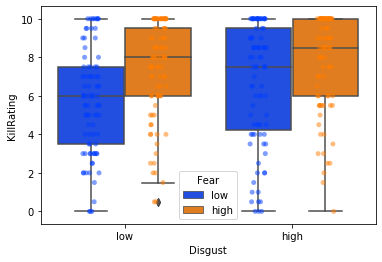

In [19]:
DF_plot = seaborn.boxplot(y = OV , x = PV1 ,
                               data = DF,
                               palette = "bright",
                               hue = PV2)

DF_plot = seaborn.stripplot(y = OV , x = PV1 ,
                                   data = DF,
                                   jitter = True,
                                   dodge = True,
                                   marker = 'o',
                                   alpha = 0.5,
                                   hue = PV2,
                                   palette = "bright")

handles, labels = DF_plot.get_legend_handles_labels()

the_legend = plt.legend(handles[0:2], labels[0:2], title = PV2, loc = 8)


### 4. Testing

This last bit is only to test whether we are currently operating in the main module. If so, the following will be printed to demonstrate the variables of the dataframe. If this script has been imported, the following command won't run.

In [20]:
if __name__ == "__main__" :
    print("The Predictor Variable 1 is: ", PV1, ", The Predictor Variable 2 is:", PV2, ", and the Outcome Variable is: ", OV)
    

The Predictor Variable 1 is:  Disgust , The Predictor Variable 2 is: Fear , and the Outcome Variable is:  KillRating


I hope you enjoyed reading this Notebook through.  <br />  Please do not hesitate to reach me at dyilmaz2014@gmail.com if you have any questions.  <br />  *Stay well and healthy!*   <br /> Best, Deniz

